In [4]:
from PIL import Image 
from pylab import *
from matplotlib import pyplot as plt

In [1]:
import medimage.preprocess.filters as check

In [8]:
blur_img = check.GaussianBlur('nikhil.jpg',1)

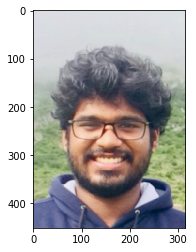

In [9]:
plt.imshow(blur_img)

In [18]:
img=Image.open("nikhil.jpg")

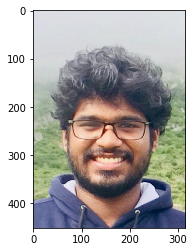

In [19]:
plt.imshow(img)

In [45]:
img.save("temp.png")

Crop

In [46]:
dim = (50,50,500,500) #Dimensions of the ROI
crop_img = img.crop(dim)

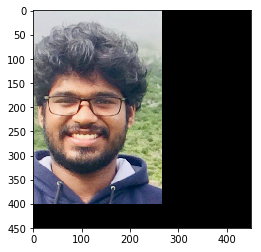

In [47]:
plt.imshow(crop_img)

the pixel values of an RGB image and a grayscale

In [48]:
img.getpixel((100,100))

(125, 122, 131)

In [49]:
img.convert("L").getpixel((100,100))

123

To convert an image from RGB color space to grayscale color space,

In [50]:
grayscale = img.convert("L")

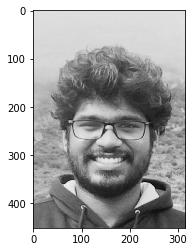

In [51]:
plt.imshow(grayscale)

Geometrical transformation

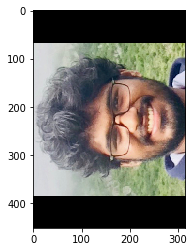

In [53]:
rotate_img = img.rotate(90)
plt.imshow(rotate_img)

Image enhancement

In [54]:
from PIL import ImageEnhance

In [55]:
enhancer = ImageEnhance.Brightness(img)

In [76]:
new_enchance = enhancer.enhance(2)
new_enchance1 = enhancer.enhance(3)

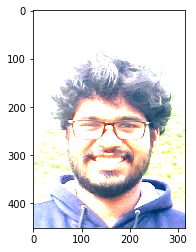

In [77]:
plt.imshow(new_enchance)

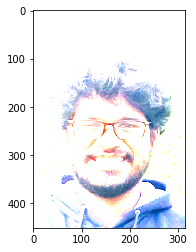

In [78]:
plt.imshow(new_enchance1)

Accessing pixels of an image

In [79]:
img.getpixel((100,100))

(125, 122, 131)

In [80]:
img.putpixel((100,100),(20,230,145))

In [81]:
img.getpixel((100,100))

(20, 230, 145)

Introduction to scikit-image

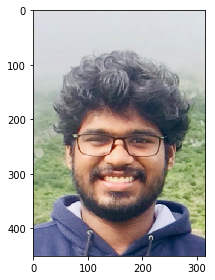

In [83]:
from skimage import io
img = io.imread("nikhil.jpg")
io.imshow("nikhil.jpg")
io.show()

Writing/saving an image:

In [89]:
img = io.imread("nikhil.jpg")
io.imsave("new_image.jpg",img)

Data module:

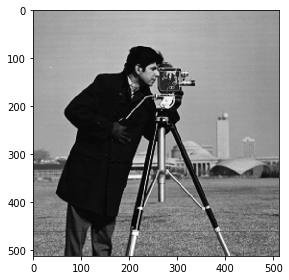

In [90]:
from skimage import data
io.imshow(data.camera())
io.show()

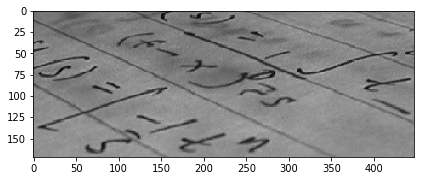

In [121]:
data=io.imshow(data.text())
io.show()

Color module:

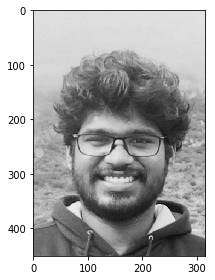

In [93]:
from skimage import io, color
gray = color.rgb2gray(img)
io.imshow(gray)
io.show()

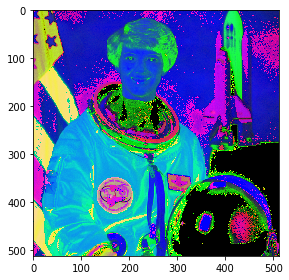

In [96]:
img = data.astronaut()
img_hsv = color.rgb2hsv(img) #Convert RGB to HSV:
io.imshow(img_hsv)
io.show()

Draw module:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:77: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


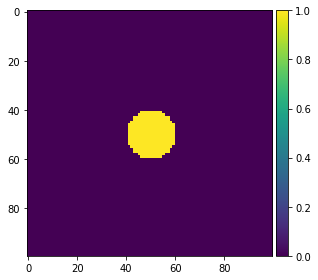

In [97]:
import numpy as np
>>> from skimage import io, draw
>>> img = np.zeros((100, 100), dtype=np.uint8)
>>> x , y = draw.circle(50, 50, 10)
>>> img[x, y] = 1
>>> io.imshow(img)
>>> io.show()

Ellipses:

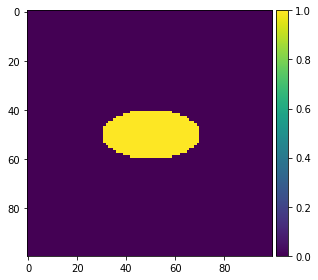

In [99]:
>>> import numpy as np
>>> from skimage import io, draw
>>> img = np.zeros((100, 100), dtype=np.uint8)
>>> x , y = draw.ellipse(50, 50, 10, 20)
>>> img[x, y] = 1
>>> io.imshow(img)
>>> io.show()

Polygon

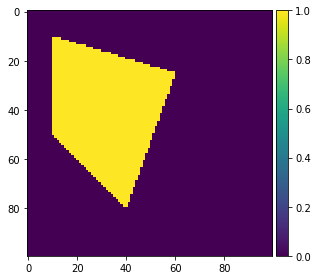

In [100]:
>>> import numpy as np
>>> from skimage import io, draw
>>> img = np.zeros((100, 100), dtype=np.uint8)
>>> r = np.array([10, 25, 80, 50])
>>> c = np.array([10, 60, 40, 10])
>>> x, y = draw.polygon(r, c)
>>> img[x, y] = 1
>>> io.imshow(img)
>>> io.show()

Unit 2
Filters and Features

An image derivative is defined as the change in the pixel value of an image.

We can use finite difference methods to calculate the
derivatives such as forward difference, backward difference, and central difference. Finite
difference methods are defined as follows:

Forward difference:
f (x + 1) - f (x)

Backward difference:
f(x) – f(x-1)

Central difference:
f(x+1) – f(x-1)

Given an image matrix, we can find the derivative using another matrix called mask or
kernel. For example, the derivative masks for forward, backward, and central difference are
as follows:

[1 -1]

[-1 1]

[1 0 -1]

Understanding image filters


Gaussian blur
What this means is that when we create a kernel that follows a Gaussian distribution, the center pixel gets the most weight and its neighboring pixels get lesser weight when performing convolution. The pixel which has to be modified will have the highest weight in the kernel and the weight decreases for the pixels which are far away.

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=316x451 at 0x115D18F98>


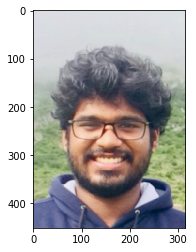

In [7]:
from PIL import Image
from PIL import ImageFilter
img = Image.open("nikhil.jpg")
print(img)
blur_img = img.filter(ImageFilter.GaussianBlur(1))
plt.imshow(blur_img)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/skimage/filters/_gaussian.py:108: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  warn(RuntimeWarning(msg))


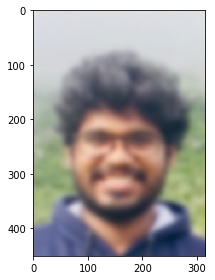

In [4]:
from skimage import io
from skimage import filters
img = io.imread("nikhil.jpg")
out = filters.gaussian(img, sigma=5)
io.imshow(out)
io.show()

Median filter

This is a very simple filter that returns the median value from the pixel and its neighbors.

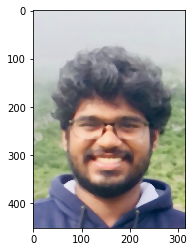

In [3]:
from PIL import Image
from PIL import ImageFilter
img = Image.open("nikhil.jpg")
blur_img = img.filter(ImageFilter.MedianFilter(7))
plt.imshow(blur_img)

Dilation and erosion

Consider a scenario where you have two objects in
an image and they are really close by, and you do want your algorithm to assume that they
are the same object. Hence you shrink both the objects to mark a clear distinction between
the two objects. Another use case of erosion is to remove noise from the image. Erosion
might not be the best option to remove all kinds of noise

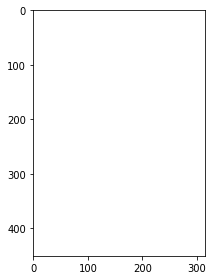

In [119]:
from skimage import morphology
from skimage import io

eroded_img = morphology.binary_erosion(gray)
io.imshow(eroded_img)
io.show()

Dilation
Dilation is just the opposite of erosion. While in erosion we shrunk parts of the image, here
we try to expand the parts of the image. Dilation finds its use in situations where we want
to magnify small details of the image.

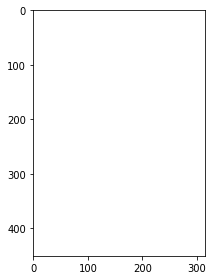

In [123]:
from skimage import morphology
from skimage import io
#img = io.imread('image.png')
dilated_img = morphology.binary_dilation(gray)
io.imshow(dilated_img)
io.show()

Custom filters


In [124]:
from PIL import ImageFilter
kernel = ImageFilter.Kernel((3,3), [1,2,3,4,5,6,7,8,9])

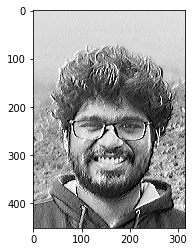

In [127]:
from PIL import Image
from PIL import ImageFilter
img = Image.open("nikhil.jpg")
img = img.convert("L")
new_img = img.filter(ImageFilter.Kernel((3,3),[1,0,-1,5,0,-5,1,0,1]))
plt.imshow(new_img)

Image thresholding

Thresholding in image processing means to update the color value of a pixel to either white
or black according to a threshold value. If the pixel value is greater than the threshold
value, then set the pixel to WHITE, otherwise set it to BLACK. There are variations to
thresholding as well. One of them is inverse thresholding, where we flip greater than to
lesser than and everything else remains the same.

In [128]:
from skimage.filters import threshold_otsu, threshold_adaptive
from skimage.io import imread, imsave
from skimage.color import rgb2gray
img = imread('nikhil.jpg')
img = rgb2gray(img)
thresh_value = threshold_otsu(img)
thresh_img = img > thresh_value

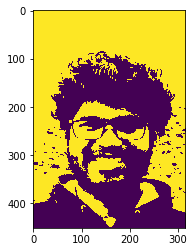

In [129]:
plt.imshow(thresh_img)

Edge detection
Sobel edge detector

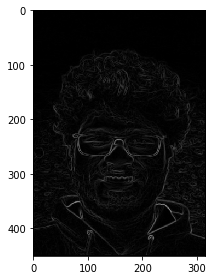

In [130]:
from skimage import io
from skimage import filters
from skimage import color
img = io.imread("nikhil.jpg")
img = color.rgb2gray(img)
edge = filters.sobel(img)
io.imshow(edge)
io.show()

Canny edge detector
The Canny edge detector is another very important algorithm. It also uses the concept of
gradients like in the Sobel edge detector, but in Sobel we only considered the magnitude of
the gradient. In this we will also use the direction of the gradient to find the edges.
This algorithm has four major steps:

1. Smoothing: In this step, the Gaussian filter is applied to the image to reduce the noise in the image.

2. Finding the gradient: After removing the noise, the next step is to find the gradient magnitude and direction by calculating the x-derivative and y-derivative. The direction is important, as the gradient is always perpendicular to the edge. Therefore, if we know the direction of the gradient, we can find the direction of the edges as well.

3. Nonmaximal suppression: In this step, we check whether the gradient calculated is the maximum among the neighboring points lying in the positive and negative direction of the gradient; that is, whether it is the local maxima in the direction of the gradient. If it is not the local maxima, then that point is not part of an edge.

4. Thresholding: In this algorithm, we use two threshold values--the high threshold and low threshold, unlike in Sobel where we just used one threshold value. This is called hysteresis thresholding. Let's understand how this works. We select all the edge points, which are above the high threshold and then we see if there are neighbors of these points which are below the high threshold but above the low threshold; then these neighbors will also be part of that edge. But if all the points of an edge are below the high threshold, then these points will not be selected.

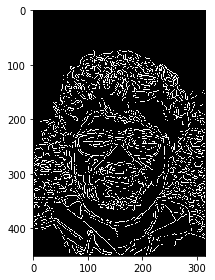

In [13]:
from skimage import io
from skimage import feature
from skimage import color
img = io.imread("nikhil.jpg")
img = color.rgb2gray(img)
edge = feature.canny(img,1)
io.imshow(edge)
io.show()

Segmentation - Understanding Images Better

Contour detection
Let's start with one of the easiest techniques of segmentation—contours. Simply put,contours are nothing but boundaries of objects in an image. Say, for example, you have different types of bottles in an image and you want to segment out each one of them.
The contour detection algorithm will try to trace out the boundaries for each bottle and form a closed loop. Each closed loop in the image represents a contour. You might wonder, aren't contours similar to edges? There is a very subtle difference between them—contours always form closed loops whereas edges can remain open. A contour detection algorithm will try to
group edges together that will result in a closed loop.

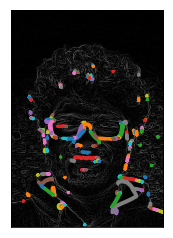

In [139]:
from skimage import measure
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.filters import sobel
import matplotlib.pyplot as plt
#Read an image
img = imread('nikhil.jpg')
#Convert the image to grayscale
img_gray = rgb2gray(img)
#Find edges in the image
img_edges = sobel(img_gray)
#Find contours in the image
contours = measure.find_contours(img_edges, 0.2)
# Display the image and plot all contours found
fig, ax = plt.subplots()
ax.imshow(img_edges, interpolation='nearest', cmap=plt.cm.gray)
for n, contour in enumerate(contours):
    ax.plot(contour[:, 1], contour[:, 0], linewidth=3)
ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

The Watershed algorithm
We find out the local gradients of the image. By doing so, we will identify all the
local minimums in our images. These local minimums will give us an approximate idea of
where the objects could possibly be located. In technical terms, these local minimums are
called markers. We assign each marker with a unique color and then start filling these
colors until we reach the boundary of an adjacent marker.


1. Read the image that you want to segment.
2. Convert it into grayscale (only if it is not in grayscale already).
3. Convert the image pixel values to unsigned int using the img_as_ubyte()
function. This is because the gradient function expects the image in a certain
format.
4. Calculate the local gradients of the image.
5. Apply the Watershed algorithm.

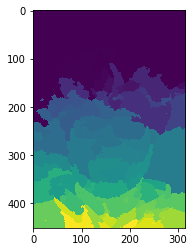

In [142]:
from scipy import ndimage as ndi
from skimage.morphology import watershed, disk
from skimage import data
from skimage.io import imread
from skimage.filters import rank
from skimage.color import rgb2gray
from skimage.util import img_as_ubyte
#img = data.astronaut()
img = imread('nikhil.jpg')
img_gray = rgb2gray(img)
image = img_as_ubyte(img_gray)
#Calculate the local gradients of the image
#and only select the points that have a
#gradient value of less than 20
markers = rank.gradient(image, disk(5)) < 20
markers = ndi.label(markers)[0]
gradient = rank.gradient(image, disk(2))
#Watershed Algorithm
labels = watershed(gradient, markers)

plt.imshow(labels)

Superpixels

Images are always dealt with by the granularity of a pixel. But this can sometimes be
computationally expensive. You do not always want to iterate through all the pixels in the
image. As an attempt to remove redundancy in the pixels of an image, we try to combine
pixels closer to each other that have the same color value into a cluster and then call those
clusters superpixels. The advantage of doing this is that now instead of going through a few
pixels we just go through one superpixel, which is nothing but a combination of these
pixels.

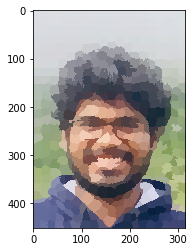

In [145]:
from skimage import segmentation, color
from skimage.io import imread
from skimage.future import graph
from matplotlib import pyplot as plt
img = imread('nikhil.jpg')
img_segments = segmentation.slic(img, compactness=20, n_segments=500)
superpixels = color.label2rgb(img_segments, img, kind='avg')
plt.imshow(superpixels)

As we can see in the output, pixels that were of a similar color and close to each other were
clustered together into one blob of mean color. Each of these blobs are called superpixels.
Superpixels are used as the starting point for many image segmentation algorithms as they
increase the efficiency of the algorithms.

Normalized graph cut
The following is a step-by-step explanation of the implementation using scikit-image:
1. Read the image.
2. Perform k-means clustering over color values. In our implementation, we use the
SLIC method for clustering.
3. Using the clustered pixels from the previous step, we create a weighted graph
over these clusters. The weight of each edge is determined by how similar two
regions are.
4. We apply the normalized graph cut technique over the graph obtained in the last
step.

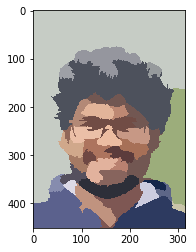

In [149]:
from skimage import data, segmentation, color
from skimage.io import imread
from skimage import data
from skimage.future import graph
img = imread('nikhil.jpg')
#img = data.astronaut()
img_segments = segmentation.slic(img, compactness=30, n_segments=200)
out1 = color.label2rgb(img_segments, img, kind='avg')
segment_graph = graph.rag_mean_color(img, img_segments, mode='similarity')
img_cuts = graph.cut_normalized(img_segments, segment_graph)
normalized_cut_segments = color.label2rgb(img_cuts, img, kind='avg')
plt.imshow(normalized_cut_segments)

Integrating Machine Learning with Computer Vision

In [151]:
import sklearn

In [154]:
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers.core import Activation, Flatten, Dense
from keras.optmizers import SGD
from keras.utils import np_utils
from sklearn import datasets
#Config values
num_classes=9
img_depth=1
img_height=28
img_width=28
#Creating the LeNet model
model = Sequential()
#Adding the first convolutional layer
model.add(Convolution2D(20, 5, 5, border_mode="same",input_shape=(img_depth, img_height, img_width)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
#Adding the second convolutional layer
model.add(Convolution2D(50, 5, 5, border_mode="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
#Adding the fully connected layers
model.add(Flatten())
model.add(Dense(500))
#Load MNIST data
model.add(Activation("relu"))
#Adding a softmax layer
model.add(Dense(num_classes))
model.add(Activation("softmax"))
mnist = datasets.fetch_mldata("MNIST Original")
#MNIST data is a flat array of size 784.
#We need to reshape it be in 28x28 images as we have to feed it to a convolutional layer
mnist.data = mnist.data.reshape((mnist.data.shape[0], 28, 28))
mnist.data = mnist.data[:, np.newaxis, :, :]
mnist.data = mnist.data / 255.0 #Normalize the images to [0, 1.0]
#Split the data into train and test set
train_data, test_data, train_label, test_label =train_test_split(minist.data, mnist.target, test_size=0.25)
train_label = np_utils.to_categorical(train_label, 10)
test_label = np_utils.to_categorical(test_label, 10)
#Set the loss funtions and evaluation metrics
model.compile(loss="categorical_crossentropy", optimizer=SGD(lr=0.0001),
metrics=["accuracy"])
#Train the LeNet model
model.fit(train_data, train_label, batch_size=32, no_epoch=30, verbose=1)
#Test the model
loss, accuracy = model.evaluate(test_data, test_label, batch_size=64,
verbose=1)
print("Accuracy: %".format(accuracy * 100))

Using TensorFlow backend.


ModuleNotFoundError: No module named 'keras.optmizers'

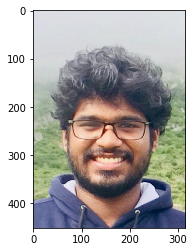

In [164]:
import cv2
%matplotlib inline
img = cv2.imread("nikhil.jpg")
img2 = img[:,:,::-1]
#cv2.imshow("img",img)
plt.imshow(img2)

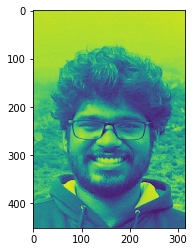

In [172]:
import cv2
img = cv2.imread("nikhil.jpg")
img2 = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
cv2.imwrite("gray_image.jpg", gray)
cv2.imshow("image",gray)
plt.imshow(gray)